In [24]:
import kex_data
import kex_headers

In [25]:
limo_dset, _ = kex_data.listmode()

In [26]:
limo_dset = [v[:100*1000] for v in limo_dset] # subset for testing

In [27]:
import petlink

In [28]:
shape=kex_headers.HISTOGRAM_SHAPE
toflor_dset = [petlink.get_tof_lor_bins(petlink.get_events(limo), shape) for limo in limo_dset]

In [29]:
delay_toflor = [ toflor[:,toflor[0] == 13] for toflor in toflor_dset]

In [30]:
import representation

In [31]:
delay_image_points = [representation.get_img_bins2(toflor) for toflor in delay_toflor]    

In [32]:
import listmode

In [33]:
img_shape = kex_headers.IMAGE_SHAPE
delay_is_fov = [listmode.is_fov(points, img_shape) for points in delay_image_points]
images = [listmode.get_histogram(points[:, is_fov], img_shape) for points, is_fov  in zip(delay_image_points, delay_is_fov)]

In [34]:
import volume_view as vv
import importlib
importlib.reload(vv)

<module 'volume_view' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\volume_view.py'>

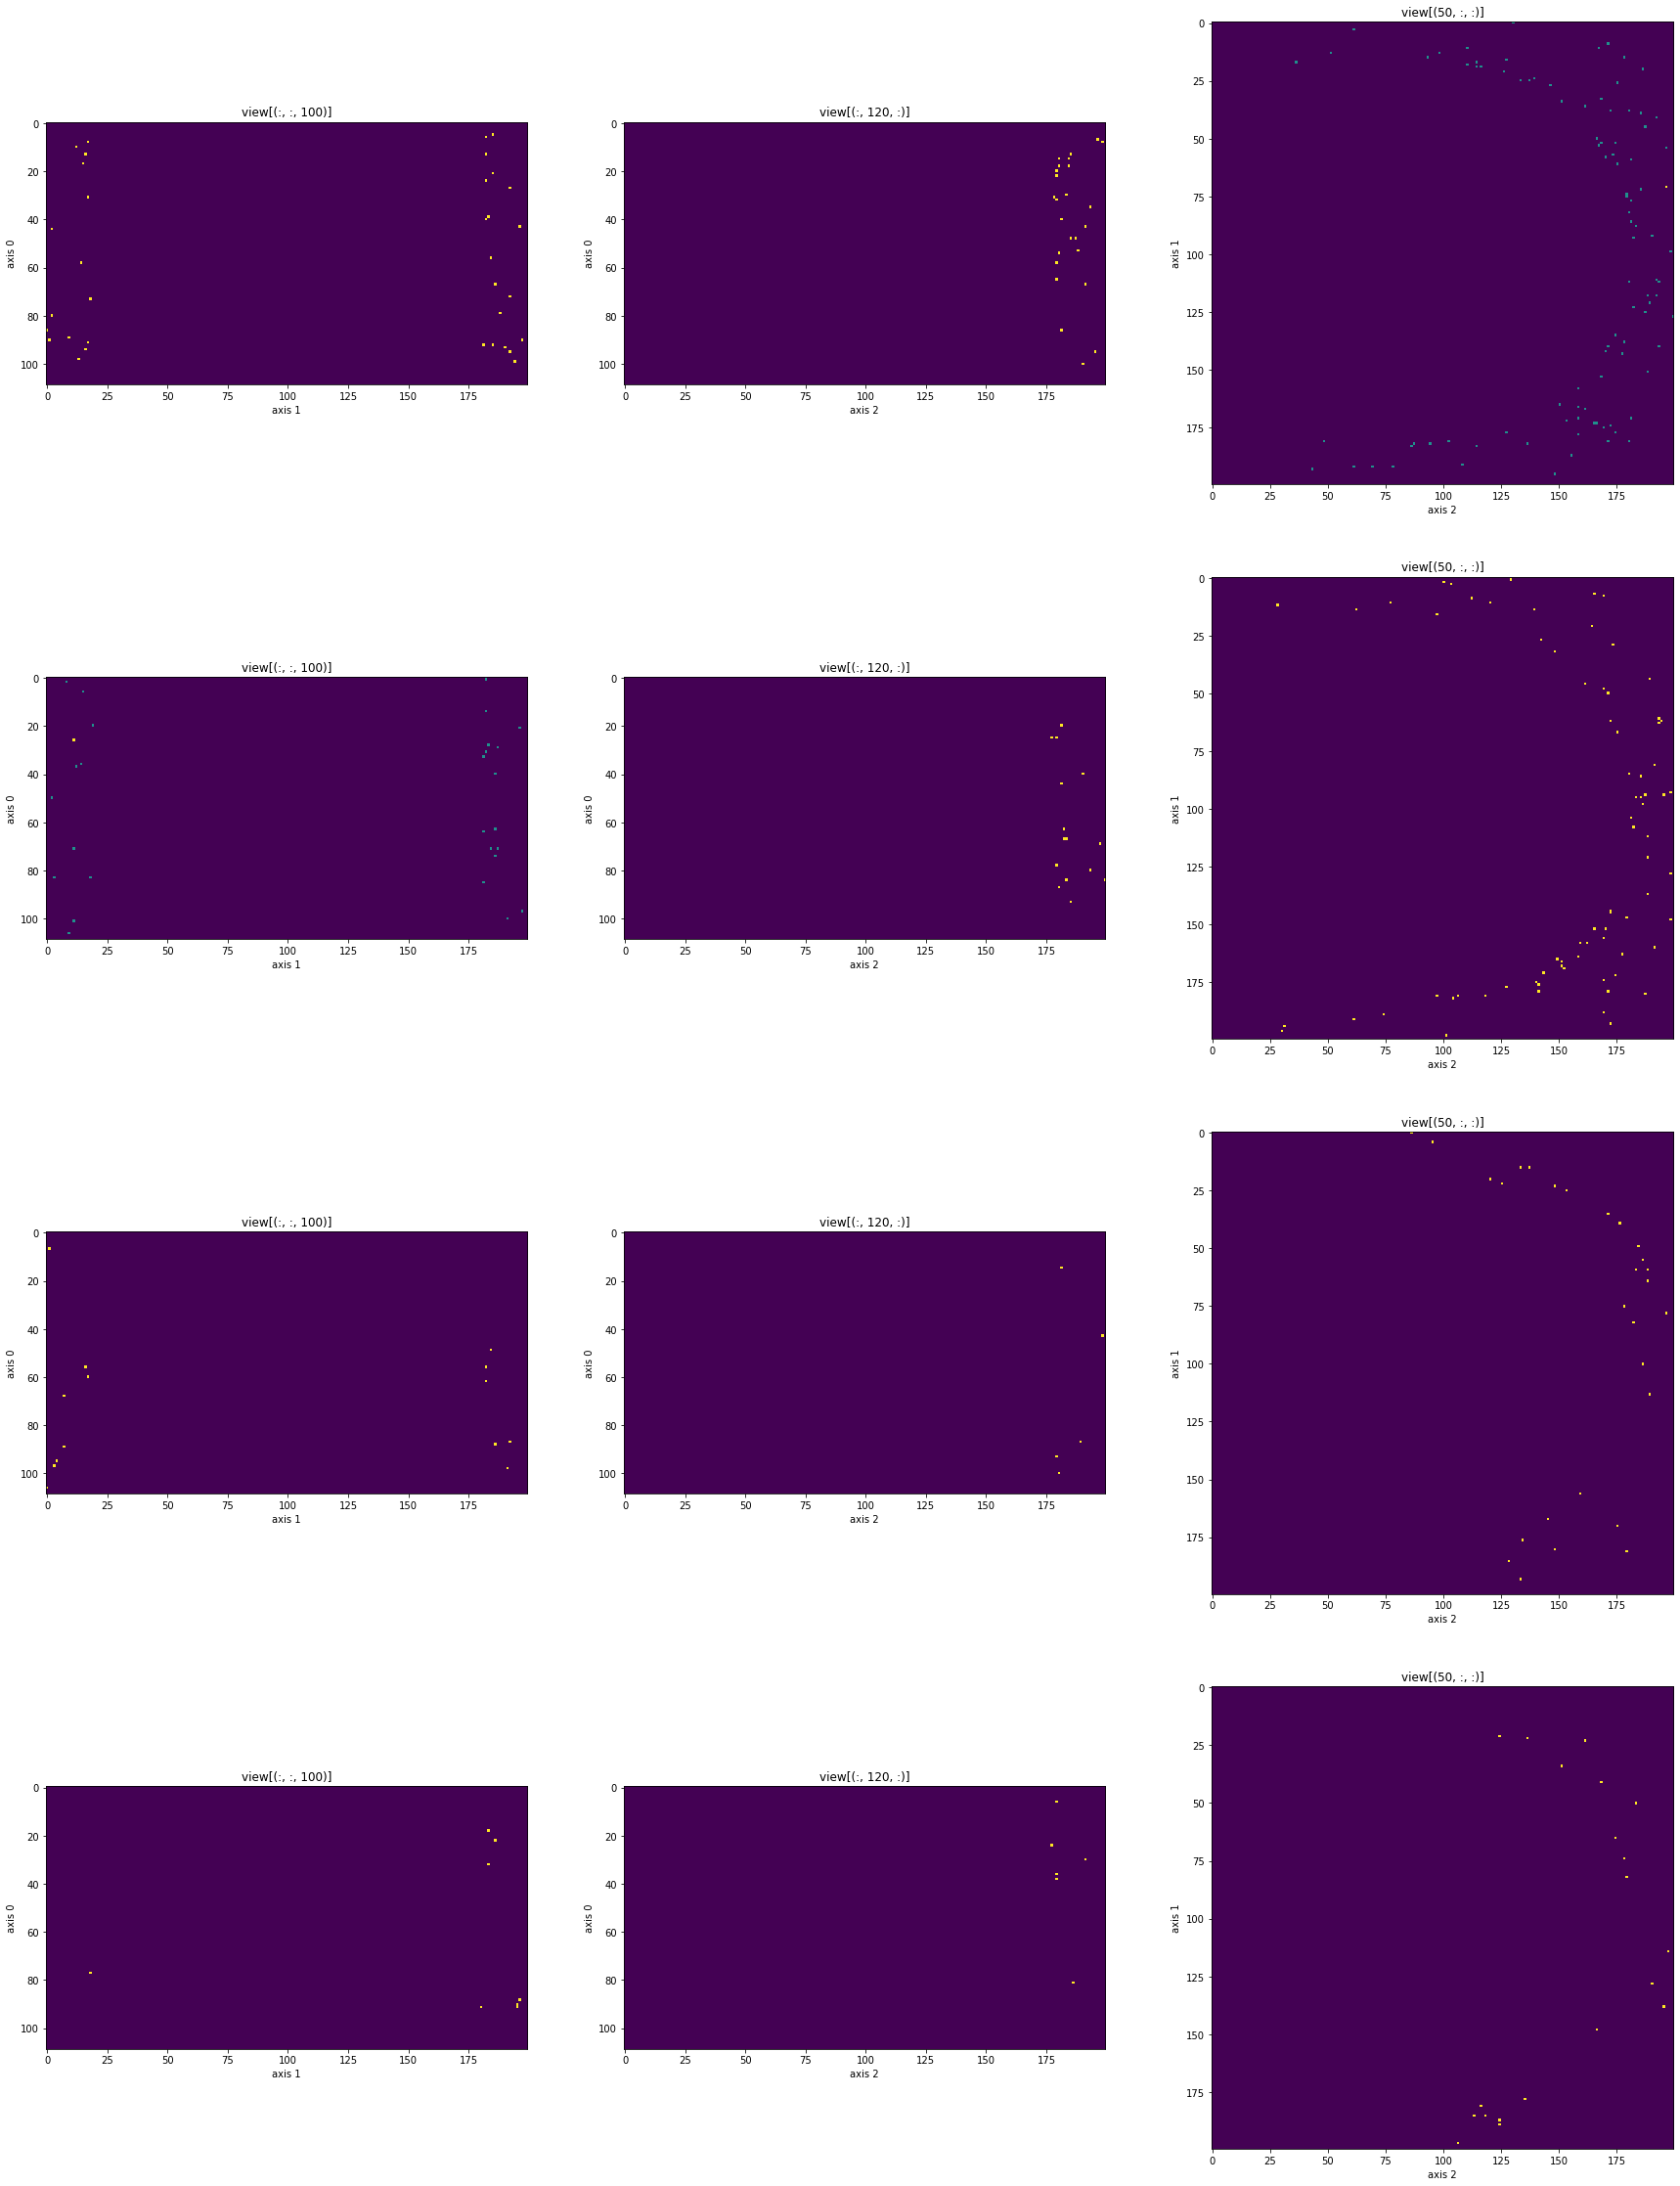

In [35]:
fig, rows = vv.setup_fig_axes(images)
for image, row in zip(images, rows):
    vv.plot_views(image, position=[50,120,100], axes=row)

In [36]:
print(13*0.3125*10**-9)

4.0625e-09


In [37]:
4062.5*10**-12 #4062.5ps

4.0625e-09

In [91]:
import numpy as np
ntof = 13
fake_bin= np.zeros((4,ntof), dtype=int)
fake_bin[0] = np.arange(ntof)
fake_bin[-1] = 200
fake_bin[2] = 0
print(fake_bin)
pixel = representation.get_img_bins2(fake_bin)
print(pixel)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [200 200 200 200 200 200 200 200 200 200 200 200 200]]
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [ 98.56259709  87.06337378 110.06182039  75.56415048 121.5610437
   64.06492717 133.060267    52.56570387 144.5594903   41.06648057
  156.05871361  29.56725726 167.55793691]
 [100.02688251 100.24194255  99.81182246 100.45700259  99.59676242
  100.67206263  99.38170238 100.88712267  99.16664234 101.10218271
   98.9515823  101.31724275  98.73652226]]


In [94]:
import kex_headers
tof_img = listmode.get_histogram(pixel.astype(int), shape=kex_headers.IMAGE_SHAPE, dtype=int)

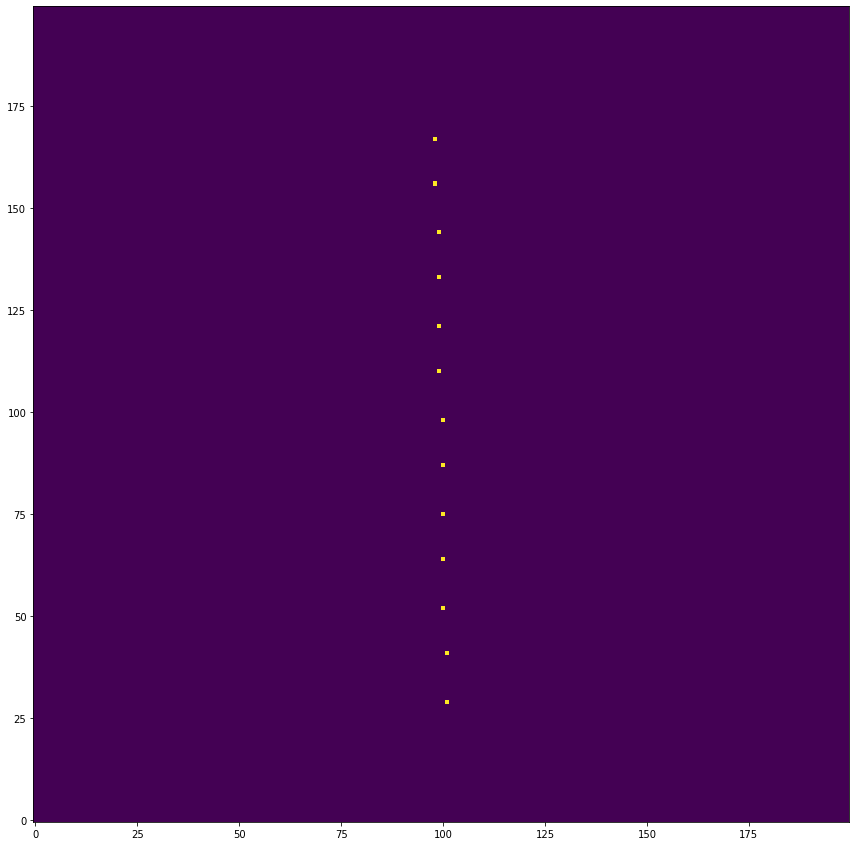

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(tof_img[0], origin='down');

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [399 399 399 399 399 399 399 399 399 399 399 399 399 399]]
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [100.19669162  88.69746832 111.69591493  77.19824501 123.19513823
   65.69902171 134.69436153  54.19979841 146.19358484  42.7005751
  157.69280814  31.2013518  169.19203145  19.70212849]
 [187.40163528 187.61669532 187.18657524 187.83175536 186.9715152
  188.0468154  186.75645515 188.26187545 186.54139511 188.47693549
  186.32633507 188.69199553 186.11127503 188.90705557]]


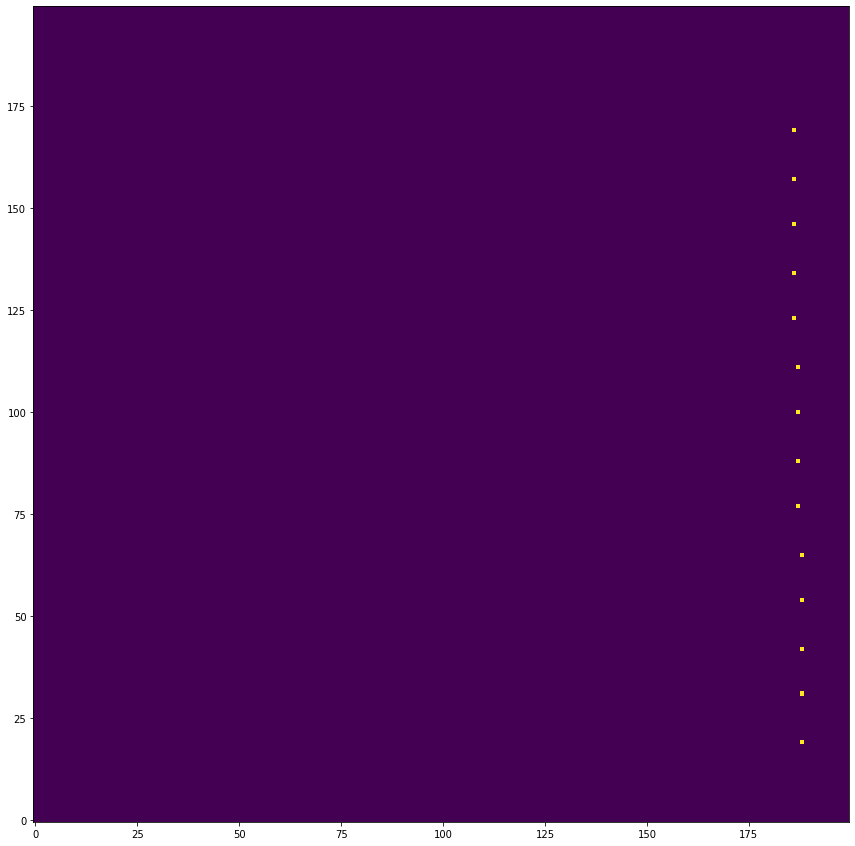

In [104]:
import numpy as np
ntof = 14
fake_bin= np.zeros((4,ntof), dtype=int)
fake_bin[0] = np.arange(ntof)
fake_bin[-1] = 399
fake_bin[2] = 0
print(fake_bin)
pixel = representation.get_img_bins2(fake_bin)
print(pixel)

import kex_headers
img = listmode.get_histogram(pixel.astype(int), shape=kex_headers.IMAGE_SHAPE, dtype=int)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(img[0], origin='down');

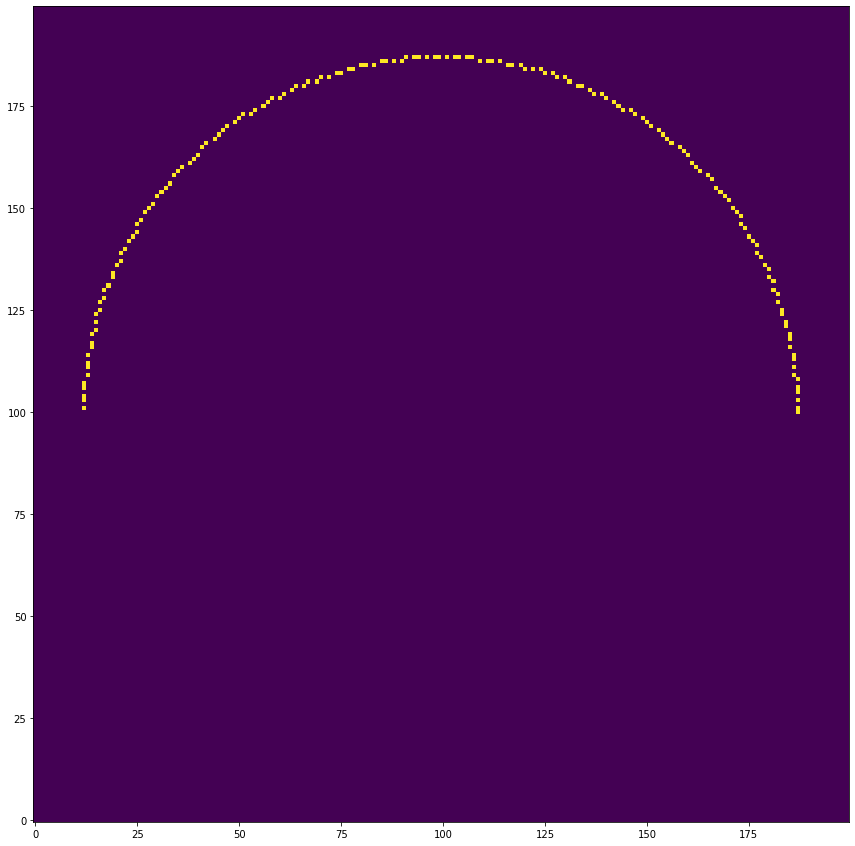

In [105]:
import numpy as np
nangles = 168
fake_bin= np.zeros((4,nangles), dtype=int)
fake_bin[2] = np.arange(nangles)
fake_bin[-1] = 400-1
#print(fake_bin)
pixel = representation.get_img_bins2(fake_bin)
#print(pixel)

import kex_headers
fov_img = listmode.get_histogram(pixel.astype(int), shape=kex_headers.IMAGE_SHAPE, dtype=int)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(fov_img[0], origin='down');

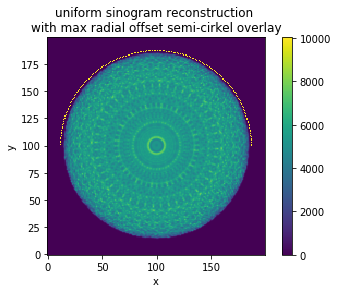

In [106]:
import filefit
v_path = kex_data.get_v_path(r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/test_my_norm/denormed.mhdr")
recon = filefit.get_v_data(v_path)
plt.imshow(recon[50]+fov_img[0]*10000, origin='down')
plt.colorbar()



plt.xlabel("x")
plt.ylabel('y')
plt.title("uniform sinogram reconstruction \nwith max radial offset semi-cirkel overlay");

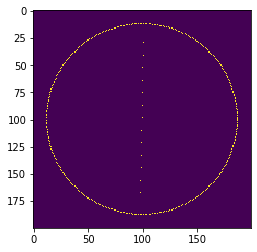

In [108]:
plt.imshow(tof_img[0]  + fov_img[0] + fov_img[0][::-1])